# Discrete Signals


## Elementary Operations

- Operations like superposition, shifting and flipping can be used to construct signals with a more complex structure than by the [standard signals](standard_signals.ipynb) alone.   
- In the following, a set of elementary operations is introduced  that are frequently used in discrete signal processing for this purpose.  
- Note that the equivalent operation to the [temporal scaling of a continuous signal](../continuous_signals/operations.ipynb#Temporal-Scaling) is not defined for a discrete signal.

### Superposition

- *The* weighted superposition $x[k]$ of two signals $x_1[k]$ and $x_2[k]$ is given as  
\begin{equation}
x[k] = A \cdot x_1[k] + B \cdot x_2[k]
\end{equation}
with the complex weights $A, B \in \mathbb{C}$.

> **Example**

- The following example illustrates the superposition of two harmonic signals $x(t) = A \cdot \cos[\Omega_1 k] + B \cdot \cos[\Omega_2 k]$ with weights $A$, $B$ and normalized frequencies $\Omega_1$ and $\Omega_2$.

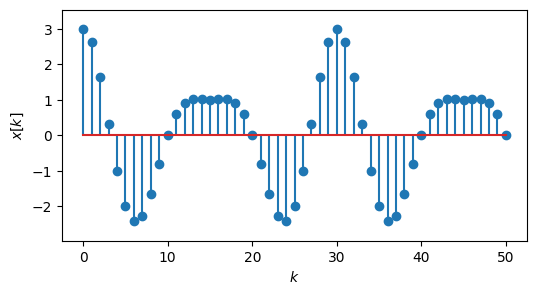

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

k = np.arange(0, 51)
x = np.cos(2 * np.pi / 10 * k) + 2 * np.cos(2 * np.pi / 15 * k)

plt.figure(figsize=(6, 3))
plt.stem(k, x)
plt.xlabel('$k$')
plt.ylabel('$x[k]$')
plt.gca().margins(y=0.1)

### Shift

- The shift of a signal $s[k]$ by the index $\kappa$ is defined as  
\begin{equation}
x[k] = s[k-\kappa]
\end{equation}
with $\kappa \in \mathbb{Z}$. The signal $s[k]$ is  
  * shifted to the right for $\kappa > 0$
  * shifted to the left for $\kappa < 0$

- The shift of a signal is a frequently applied operation in discrete signal processing.  
- For instance for the description of systems by linear difference equations with constant coefficients.   
- For a discrete signal which has been derived by [temporal sampling from a continuous signal](../sampling/ideal.ipynb), the shift can be interpreted as [temporal shift](../continuous_signals/operations.ipynb#Temporal-Shift) by the time $\tau = \kappa \cdot T$ where $T$ denotes the sampling interval.

> **Example**

- In order to illustrate the shifting of signals, the construction of a [sawtooth signal](https://en.wikipedia.org/wiki/Sawtooth_wave) by a superposition of shifted ramp signals $k \cdot \text{rect}_N[k]$ is shown.  
- The sawtooth signal is given as periodic continuation of the ramp signal

\begin{equation}
x[k] = \sum_{\nu = -\infty}^{\infty} (k - \nu \cdot N) \cdot \text{rect}_N[k - \nu \cdot N]
\end{equation}

- The signal can be computed efficiently using the [modulo operation](https://en.wikipedia.org/wiki/Modulo_operation)  
\begin{equation}
x[k] = k \bmod N
\end{equation}  
which is illustrated in the following

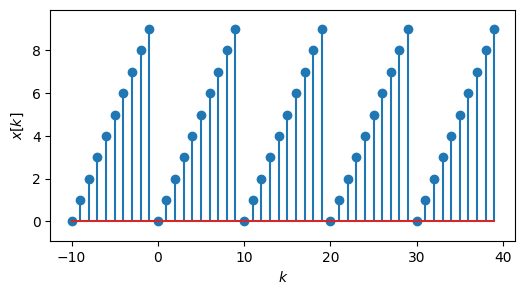

In [2]:
def sawtooth(k, N):
    return np.mod(k, N)


k = np.arange(-10, 40)
x = sawtooth(k, 10)

plt.figure(figsize=(6, 3))
plt.stem(k, x)
plt.xlabel('$k$')
plt.ylabel('$x[k]$')
plt.gca().margins(y=0.1)

### Flipping

- The flipping of a signal $s[k]$ is defined as  
\begin{equation}
x[k] = s[\kappa - k]
\end{equation}
with $\kappa \in \mathbb{Z}$.   
- The flipping operation can also be represented as a reversal of the index $k$ of the signal $s[k]$ followed by a shift of $\kappa$ of the reversed signal, as $s[\kappa - k] = s[- (k - \kappa)]$.   
- The operation can interpreted geometrically as a mirroring of the signal $s[k]$ at the vertical axis $k = \frac{\kappa}{2}$.

- For $\kappa = 0$ this results in a reversal of the signal.  
- The reversal can be interpreted as time-reversal for a discrete signal which has been derived by temporal sampling from a continuous signal.

> **Example**

- The following example illustrates the temporal flipping of the sawtooth signal $x[k]$ introduced above for $\kappa = 3$.

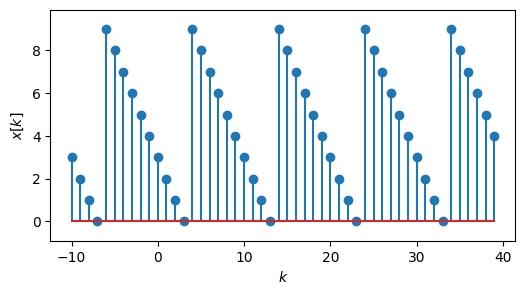

In [3]:
x = sawtooth(3 - k, 10)

plt.figure(figsize=(6, 3))
plt.stem(k, x)
plt.xlabel('$k$')
plt.ylabel('$x[k]$')
plt.gca().margins(y=0.1)

> **Excercise**

* Realize the temporal flipping by splitting it into two operations:
    1. time-reversal and
    2. temporal shift.

---
## Q&A